### Анализ пользовательского опыта сервиса GoFast

## План работы  
1. Первчиное знакомство с данными: ознакомление с составом трёх таблиц, количеством пропусков, выявление дублей  
    
2. Обработка пропущенных значений и дубликатов, изменение типов данных, создание дополнительных столбцов на основе имеющейся информации

3. Проведение исследовательского анализа данны,: описание и визуализация данных об использовании сервиса по следующим параметрам:    
1) частота встречаемости городов;  
2) соотношение пользователей с подпиской и без подписки;  
3) возраст пользователей;  
4) расстояние, которое пользователь преодолел за одну поездку;  
5) продолжительность поездок  

4. Объединение данных из трёх таблиц. Визуализация и анализ данных о расстоянии и времени поездок отдельно для пользователей с подпиской и без подписки.   


5. Визуализация и анализ данных по сводной таблице по следующим параметрам для каждого пользователя за месяц использования сервиса:  
    - суммарное время использования,   
    - суммарное расстояние,  
    - количество поездок.  
Подсчёт выручки, полученой от каждого пользователя с разными тарифными планами. Добавление столбца с помесячной выручкой на основе имеющейся информации.  

6. Анализ и определение ожиданий для параметров, отражающих использование сервиса пользователями с разными типами подписки.  
Поиск зависимости выручки от типа подписки и выявление таргетных групп для будущих акций компании.
7. Исследование и рассчёт параметров, необходимых для настройки будущей акции по рассылке промо-кодов и рассылке push-уведомелений.  
8. Формулировка выводов по проведённому исследованию


In [1]:
#импорт библиотек
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
import seaborn as sns
from math import sqrt
from scipy import stats as st


np.random.seed(0)

#### Шаг 1. Загрузка данных

In [2]:
#чтение файлов

pd.set_option('display.max_columns', 50) 
pth1_1 = '/datasets/users_go.csv'
pth2_1 = 'users_go.csv'

pth1_2 = '/datasets/rides_go.csv'
pth2_2 = 'rides_go.csv'

pth1_3 = '/datasets/subscriptions_go.csv'
pth2_3 = 'subscriptions_go.csv'

if os.path.exists(pth1_1):
    data1 = pd.read_csv(pth1_1, sep=',')
elif os.path.exists(pth2_1):
    data1 = pd.read_csv(pth2_1, sep=',')
else:
    print('Something is wrong')
    
if os.path.exists(pth1_2):
    data2 = pd.read_csv(pth1_2, sep=',', parse_dates=['date'])
elif os.path.exists(pth2_2):
    data2 = pd.read_csv(pth2_2, sep=',', parse_dates=['date'])
else:
    print('Something is wrong')
    
if os.path.exists(pth1_3):
    data3 = pd.read_csv(pth1_3, sep=',')
elif os.path.exists(pth2_3):
    data3 = pd.read_csv(pth2_3, sep=',')
else:
    print('Something is wrong')    


In [3]:
display(data1.head(10))
data1.info()
display(data2.head(10)) 
data2.info()
display(data3.head(10)) 
data3.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Было проведено ознакомление с составом трёх таблиц.
В первой таблице находится 1565 записей о пользователях по следующим характеристикам:    
    - id пользователя  
    - имя  
    - возраст  
    - город  
    - тип подписки  
Во второй таблице 18068 записей о поездках пользователей по следующим парамтрам:  
    - id пользователя   
    - расстояние  
    - продолжительность  
    - дата поездки  
В третьей таблице описывается тарифы пользования сервисом по следующим параметрам:  
    - название тарифа  
    - стоимость минуту  
    - стоимость начала поездки  
    - стоимость месячной подписки  
Во всех таблицах не наблюдается пропусков, типы данных нужно будет изменять для будущих вычислений
    

#### Шаг 2. Предобработка данных

In [4]:
#приведение столбца даты к типу data
#создание стобца с номером месяца

data2['date'] = pd.to_datetime(data2['date'], format='%Y-%m-%dT%H:%M:%S')
data2['month']=data2['date'].dt.month

In [5]:
#проверка на наличие пропущенных значений

display(data1.isna().sum(), data2.isna().sum(), data3.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [6]:
display(data1['name'].unique())
display(len(data1['name'].unique()))
display(len(data1['user_id'].unique()))

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

194

1534

In [7]:
#проверка на дубликаты
print(data1.duplicated().sum())
print(data2.duplicated().sum())

31
0


In [8]:
#удаляе 31 дубликат
data1 = data1.drop_duplicates().reset_index(drop=True)
print(data1.duplicated().sum())
data1.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


При исследовании таблицы с пользователями были обнаружены и удалены 31 дубликат.   
Выявлены 194 уникальных имени и 1534 уникальных id пользователей.
Также был проведена заменена типа данных на date в столбце с датой.  
Пропуски в таблицах не были обнаружены.  

#### Шаг 3. Исследовательский анализ данных

In [9]:
#частота встречаемости городов
print(data1['city'].value_counts())
display(data1['city'].describe())
print( data1['city'].value_counts().min(), data1['city'].value_counts().max())
display(round(data1['city'].value_counts() / len(data1) * 100, 1))



Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

168 219


Пятигорск         14.3
Екатеринбург      13.3
Ростов-на-Дону    12.9
Краснодар         12.6
Сочи              12.3
Омск              11.9
Тюмень            11.7
Москва            11.0
Name: city, dtype: float64

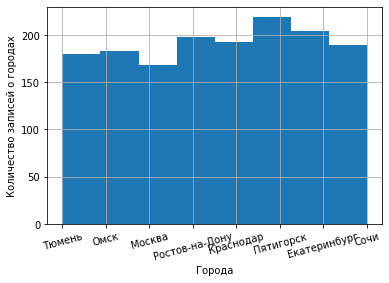

In [10]:

data1['city'].hist(bins = 8, xrot=15)

plt.xlabel('Города')
plt.ylabel('Количество записей о городах')
plt.show()

Было проведено исследование частоты встречаемости городов.  
Чаще всего пользуются сервисом в Пятигорске - на него приходится 14.5% поездок  
Реже всего пользуются сервисом в Москве - на неё приходится 11.0% поездок  

In [11]:
#соотношение пользователей с подпиской и без подписки

display(data1['subscription_type'].describe())
display(round(data1['subscription_type'].value_counts() / len(data1) * 100, 1))

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object

free     54.4
ultra    45.6
Name: subscription_type, dtype: float64

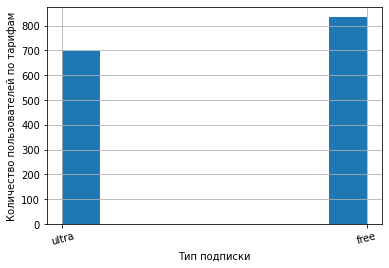

In [12]:
data1['subscription_type'].hist(bins = 8, xrot=15)

plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей по тарифам')
plt.show()

Было проведено исследование польователей по типу подписки.  
54.4% приходится на пользователей без подписки, у 45.6% пользователей есть подписка.

In [13]:
#возраст пользователей

display(data1['age'].describe())
display(round(data1['age'].value_counts() / len(data1) * 100, 1))


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

25    9.5
24    8.6
26    8.5
23    8.4
27    7.8
22    7.8
28    7.3
21    6.1
20    4.6
30    4.4
29    4.4
31    3.1
19    3.1
18    3.0
32    2.7
33    2.5
17    1.7
34    1.2
16    1.2
35    1.0
15    0.8
14    0.6
13    0.5
36    0.4
12    0.3
38    0.2
37    0.1
39    0.1
43    0.1
Name: age, dtype: float64

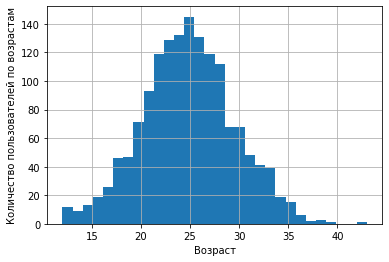

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
5%         17.000000
25%        22.000000
50%        25.000000
75%        28.000000
95%        33.000000
99%        35.000000
max        43.000000
Name: age, dtype: float64

In [14]:
data1['age'].hist(bins = 30)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей по возрастам')
plt.show()
data1['age'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

Было проведено исследование пользователей по возрасту.  
Вид распределения - нормальный.  
Средное и медианное значение возраста близки и равны 25 годам.  
Минимальный возраст = 12 лет  
Максимальный = 43 года  
99% пользователей возраста моложе 35. Старше этого возраста - редкие пользователи.  
5% пользователей моложе 17 лет - эта возрастная категория редко пользуется сервисом.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
5%         689.007279
25%       2543.226360
50%       3133.609994
75%       3776.222735
95%       4740.088596
99%       5478.621528
max       7211.007745
Name: distance, dtype: float64

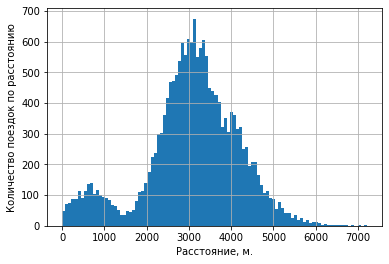

In [15]:
#расстояние, которое пользователь преодолел за одну поездку

display(data2['distance'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))
data2['distance'].hist(bins = 100)
plt.xlabel('Расстояние, м.')
plt.ylabel('Количество поездок по расстоянию')

plt.show()


Было проведено исследование расстояний (в метрах), которые преодолевают пользователи за время использования сервисом.    
Вид распределения - нормальный с локальным укрупнением в промежутке от 0 до 1500 метров.  
Среднее расстояние = 3070  
Медианное расстояние = 3133  
Минимальное = 1   
Максимальное = 7211  
5% поездок не преодолевают отметки 690 м. Это редкие короткие поездки.  
99% расстояний меньше 5478 м. Всё что больше этой отметки - аномально долгие поездки.  
Поездки по расстоянию разделились на короткие (до 1500 м.) и длинные (от 1500 до 7000 м.). При этом короткие поездки встречаются как у пользователей с подпиской так и без неё. Можно предположить, что такое разделение проявилось в следствие разницы в характере поездок: поездка может быть "по делам" (до магазина, до метро, до работы) и "прогулочной".

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
5%           8.244528
25%         13.597563
50%         17.678395
75%         21.724800
95%         28.428730
99%         32.503580
max         40.823963
Name: duration, dtype: float64

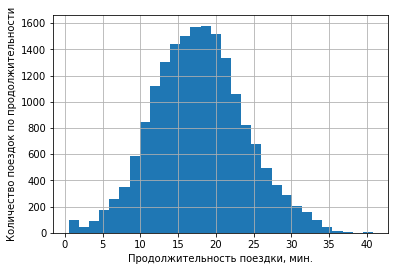

In [16]:
#продолжительность поездок

display(data2['duration'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))
data2['duration'].hist(bins = 30)
plt.xlabel('Продолжительность поездки, мин.')
plt.ylabel('Количество поездок по продолжительности')
plt.show()

Было проведено исследование времени (в минутах) пользования сервисом. 
Вид распределения - нормальный.  
Среднее значение = 17.8  
Медианное значение = 17.6  
Минимальное = 0.5   
Максимальное = 40.8  
5% поездок не больше 8 минут. Это редкие короткие поездки.  
99% поездок происходят менее 32 минут. Поездки дольше этой отметки считаются редкими долгими поездками.

#### Вывод по исследованию данных  
Было проведено исследование пользователей и поездок. В ходе исследования было выявлено:    
    1) Чаще всего сервисом пользуются в Пятигорске (14.5% поездок). Реже - в Москве (11.0% поездок)    
    2) 54.4%  пользователей не имеет подписки, у 45.6% пользователей есть подписка.  
    3) В среднем сервисом пользуются люди 25 лет, большая часть пользователей возраста от 17 до 35 лет.   
    4) Чаще всего пользователи преодолевают расстояние в 3070 м. Расстояния вне промежутка от 700 до 5500 м. являются редкими.  
    5) Пользователи преодолевают расстояния в большей части от 8 до 32 минут, в реднем за 18 минут.   

#### Шаг 4. Объединение данных

In [17]:
display(len(data1), len(data2), len(data3))
display(data1.duplicated().sum(), data2.duplicated().sum(), data3.duplicated().sum())

1534

18068

2

0

0

0

In [18]:
#объединение данных о пользователях, поездках и подписках в один датафрейм

data_users_rides = data1.merge(data2, on='user_id', how='left')
display(data_users_rides)
print(data_users_rides.duplicated().sum())
display(len(data_users_rides))

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


0


18068

In [19]:
#задублировалось 320 записей. Удалим из датафрейма


print(data_users_rides.duplicated().sum())

0


In [20]:
data = data_users_rides.merge(data3, on='subscription_type', how='left')
display(data.head(10))

display()
display(len(data), data.duplicated().sum(), data.isna().sum())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


18068

0

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Три таблицы совмещены в одну сводную. Была проведена проверка размерности таблицы до и после слияния, наличия дублей и пропусков после объединения. Размерность соотносится с исходной, проверка на наличие дубле и пропусков дала отрицательный результат.

In [21]:
#округление
#изменение типа данных
data['duration'] = np.ceil(data['duration'])
data['distance'] = np.ceil(data['distance'])
data['duration'] = data['duration'].astype('int64')
data['distance'] = data['distance'].astype('int64')



display(data.head(10))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,755,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029,27,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2771,17,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3040,15,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2843,24,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3413,16,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,749,16,2021-11-22,11,6,0,199


In [22]:
#таблица с данными о пользователях с подпиской
data_ultra = data.query('subscription_type == ["ultra"]')
display(data_ultra.head(10))
#проверка на пропуски, дубли, размерность
display(len(data_ultra), data_ultra.duplicated().sum(), data_ultra.isna().sum())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,755,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029,27,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2771,17,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3040,15,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2843,24,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3413,16,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,749,16,2021-11-22,11,6,0,199


6500

0

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

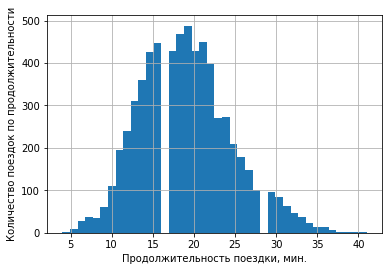

count    6500.000000
mean     3115.949231
std       836.894838
min       245.000000
25%      2786.000000
50%      3149.000000
75%      3561.000000
max      5700.000000
Name: distance, dtype: float64

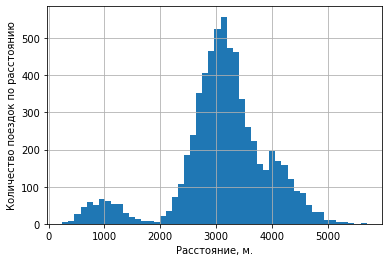

In [23]:
#визуализация расстояния и времени поездок для пользователей с подпиской

display(data_ultra['duration'].describe())
data_ultra['duration'].hist(bins = 40)
plt.xlabel('Продолжительность поездки, мин.')
plt.ylabel('Количество поездок по продолжительности')
plt.show()


display(data_ultra['distance'].describe())
data_ultra['distance'].hist(bins = 50)
plt.xlabel('Расстояние, м.')
plt.ylabel('Количество поездок по расстоянию')
plt.show()

Было проведено исследование параметров времени (в минутах) и расстояний (в метрах) пользователей с подпиской.  
В обоих случаях разброс данных не велик, средние и медианные значения практически равны.  
Исследование времени :  
Среднее значение = 18  
Медианное значение = 18  
Минимальное = 3  
Максимальное = 40  

Исследование расстояния :     
Среднее значение = 3114.9  
Медианное значение = 3148  
Минимальное = 244  
Максимальное = 5699  

In [24]:
#таблица с данными о пользователях без подписки
data_free = data.query('subscription_type == ["free"]')
display(data_free.head(10))
#проверка на пропуски, дубли, размерность
display(len(data_free), data_free.duplicated().sum(), data_free.isna().sum(), len(data_free)+len(data_ultra))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2516,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,847,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4005,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1206,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3048,18,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4343,23,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3799,19,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2985,16,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3361,17,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2568,12,2021-06-23,6,8,50,0


11568

0

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

18068

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

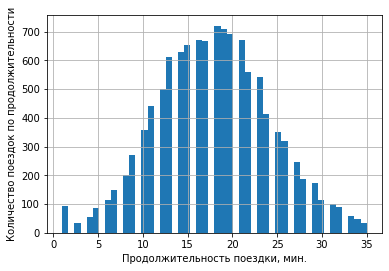

count    11568.000000
mean      3045.992911
std       1246.174341
min          1.000000
25%       2367.000000
50%       3115.000000
75%       3906.000000
max       7212.000000
Name: distance, dtype: float64

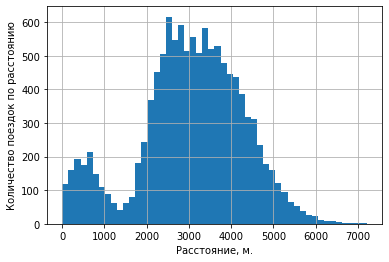

In [25]:
#визуализация расстояния и времени поездок для пользователей без подписки

display(data_free['duration'].describe())
data_free['duration'].hist(bins = 50)
plt.xlabel('Продолжительность поездки, мин.')
plt.ylabel('Количество поездок по продолжительности')
plt.show()


display(data_free['distance'].describe())
data_free['distance'].hist(bins = 50)
plt.xlabel('Расстояние, м.')
plt.ylabel('Количество поездок по расстоянию')
plt.show()

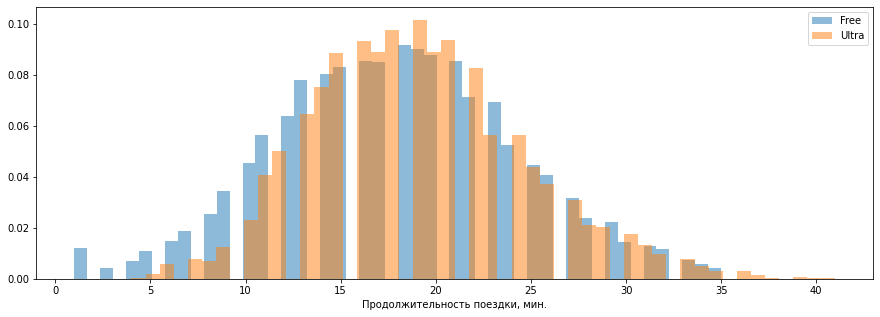

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(data_free['duration'], 50, alpha=0.5, density=True, label='Free')
ax.hist(data_ultra['duration'], 50, alpha=0.5, density=True, label='Ultra')
plt.xlabel('Продолжительность поездки, мин.')
plt.legend()
plt.show()

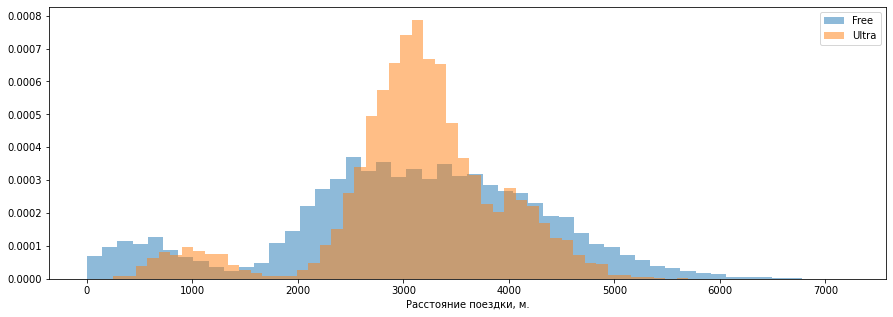

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(data_free['distance'], 50, alpha=0.5, density=True, label='Free')
ax.hist(data_ultra['distance'], 50, alpha=0.5, density=True, label='Ultra')
plt.xlabel('Расстояние поездки, м.')
plt.legend()
plt.show()

Было проведено исследование параметров времени (в минутах) и расстояний (в метрах) пользователей без подписки.  
В обоих случаях разброс данных не велик, средние и медианные значения практически равны или разница не превышает 10 процентов.  
Исследование времени :  
Среднее значение = 16.8  
Медианное значение = 17  
Минимальное = 0  
Максимальное = 34  

Исследование расстояния :    
Среднее значение = 3044.9  
Медианное значение = 3114  
Минимальное = 0  
Максимальное = 7211    
При сравнении совмещённых гистограм по расстоянию и времени использовани сервиса у пользователей с подпиской и без подписки видим:  
    1) Время поездок практически совпадает: без подписки больше коротких поездок (0-14 минут), с подпиской - больше долгих поездок (14-40 минут)  
    2) Расстояние сильно различаются: без подписки превалируют поездки 0-800 м., 1500-2500 м., 4500-7000 м. Явный пик наблюдается в расстоянии с подпиской: примерно 2500-3500 метров проезжают чаще всего пользователи по этому тарифу

#### Шаг 5. Подсчёт выручки

In [28]:
#cоздание датафрейма с агрегированными данными о поездках: 
#нахождение суммарного расстояние, количества поездок и суммарного время для каждого пользователя за каждый месяц




data_grouped1 = data.pivot_table(index=('user_id', 'month'), values= 'distance', aggfunc=('sum', 'count'))
data_grouped1 = data_grouped1.reset_index()
data_grouped2 = data.pivot_table(index=('user_id', 'month'), values='duration', aggfunc=('sum'))
data_grouped2 = data_grouped2.reset_index()

print(data_grouped1.head(20))

data_grouped = data_grouped1.merge(data_grouped2, on=['user_id', 'month'], how='outer')
data_grouped = data_grouped.rename(columns={'count': 'uses_count'})
data_grouped = data_grouped.rename(columns={'sum': 'distance_sum'})
data_grouped = data_grouped.rename(columns={'duration': 'duration_sum'})

print(data_grouped.head(20))
display(data_grouped.info())

data_grouped = data_grouped.merge(data1, on=['user_id'])
display(data_grouped)


    user_id  month  count    sum
0         1      1      2   7028
1         1      4      1    755
2         1      8      2   6724
3         1     10      2   5811
4         1     11      3   7005
5         1     12      2   6753
6         2      3      3  10190
7         2      4      2   6165
8         2      6      1   3256
9         2      7      2   6781
10        2      8      1    924
11        2     10      1   2825
12        2     12      1   3829
13        3      1      1   3062
14        3      2      2   5422
15        3      4      1   2957
16        3      5      3   9065
17        3      7      3  10921
18        3      9      1   2892
19        3     12      1   2594
    user_id  month  uses_count  distance_sum  duration_sum
0         1      1           2          7028            42
1         1      4           1           755             7
2         1      8           2          6724            46
3         1     10           2          5811            32
4         1 

None

,user_id,month,uses_count,distance_sum,duration_sum,name,age,city,subscription_type
0,1,1,2,7028,42,Кира,22,Тюмень,ultra
1,1,4,1,755,7,Кира,22,Тюмень,ultra
2,1,8,2,6724,46,Кира,22,Тюмень,ultra
3,1,10,2,5811,32,Кира,22,Тюмень,ultra
4,1,11,3,7005,56,Кира,22,Тюмень,ultra
...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3411,26,Альберт,25,Краснодар,free
11327,1534,8,2,7623,48,Альберт,25,Краснодар,free
11328,1534,9,1,4929,23,Альберт,25,Краснодар,free
11329,1534,11,4,13353,78,Альберт,25,Краснодар,free


In [29]:
display(len(data_grouped), data_grouped.duplicated().sum(), data_grouped.isna().sum())

11331

0

user_id              0
month                0
uses_count           0
distance_sum         0
duration_sum         0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [30]:
#добавление столбеца с помесячной выручкой, которую принёс каждый пользователь

def profit_count(row):
    sub_type = row['subscription_type']
    duration = row['duration_sum']
    uses_count = row['uses_count']
    if sub_type == 'ultra':
        return duration * 6 + 199
    else: 
        return duration * 8 + uses_count * 50

data_grouped['profit'] = data_grouped.apply(profit_count, axis = 1)


In [31]:
display(data_grouped)

,user_id,month,uses_count,distance_sum,duration_sum,name,age,city,subscription_type,profit
0,1,1,2,7028,42,Кира,22,Тюмень,ultra,451
1,1,4,1,755,7,Кира,22,Тюмень,ultra,241
2,1,8,2,6724,46,Кира,22,Тюмень,ultra,475
3,1,10,2,5811,32,Кира,22,Тюмень,ultra,391
4,1,11,3,7005,56,Кира,22,Тюмень,ultra,535
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3411,26,Альберт,25,Краснодар,free,308
11327,1534,8,2,7623,48,Альберт,25,Краснодар,free,484
11328,1534,9,1,4929,23,Альберт,25,Краснодар,free,234
11329,1534,11,4,13353,78,Альберт,25,Краснодар,free,824


In [32]:
#добавление столбца с вычислением прибыли от каждого пользователя в месяц


#for subtype in data_grouped:
#    if 'free'in data_grouped['subscription_type']:
#        data_grouped['profit'] = data_grouped['duration_sum'] * 8 + data_grouped['uses_count'] * 50
#    else:
#         data_grouped['profit'] = data_grouped['duration_sum'] * 6 + 199
#display(data_grouped)



In [33]:
print(data_grouped.duplicated().sum())
data_grouped = data_grouped.drop_duplicates().reset_index(drop=True)
print(data_grouped.duplicated().sum())
data_grouped.info()

0
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            11331 non-null  int64 
 1   month              11331 non-null  int64 
 2   uses_count         11331 non-null  int64 
 3   distance_sum       11331 non-null  int64 
 4   duration_sum       11331 non-null  int64 
 5   name               11331 non-null  object
 6   age                11331 non-null  int64 
 7   city               11331 non-null  object
 8   subscription_type  11331 non-null  object
 9   profit             11331 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 885.4+ KB


Была создана сводная таблица с вычислением суммарного расстояния, времени и количества поездок за конкретный месяц.  
Также был добавлен столбец с подсчётом месячной выручки, полученой от каждого пользователя сервиса.

In [34]:
data_grouped['profit'].sum()

3878641

#### Шаг 6. Проверка гипотез

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? 
Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. 
Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

#### Шаг 6.1

Формулируем нулевую и альтернативную гипотезу:  
    Нулевая: среднее время использования генеральных совокупностей пользователей с подпиской и без равны    
    Альтернативная: среднее время использования генеральной совокупностей пользователей с подпиской выше, чем без подписки

In [35]:
#проверяем одностороннюю гипотезу для двух генеральных совокупностей

alpha = 0.05 


results = st.ttest_ind(data_ultra['duration'], data_free['duration'] , equal_var=False,  alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.1814679253701353e-36
Отвергаем нулевую гипотезу


In [36]:



data_free['duration'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
5%           8.000000
25%         13.000000
50%         18.000000
75%         22.000000
95%         29.000000
99%         33.000000
max         35.000000
Name: duration, dtype: float64

Параметр количества минут, потраченных пользователями без подписки (минуты) на поездки:    
Среднее значение = 17  
Медаиннное = 17  
Среднее и медианное значения равны, большого разброса по данным не наблюдается  

In [37]:

data_ultra['duration'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
5%         11.000000
25%        15.000000
50%        19.000000
75%        22.000000
95%        29.000000
99%        34.000000
max        41.000000
Name: duration, dtype: float64

Параметр количества минут, потраченных пользователями с подпиской (минуты) на поездки:    
Среднее значение = 18  
Медаиннное = 18  
Среднее и медианное значения равны, большого разброса по данным не наблюдается  

Пользователи по подписке в среднем тратят на поездки на 1 минуту больше, чем пользователи без подписки.
Эта разница составляет 5.7% среднего значения времени на дорогу.    
Сформулирали нулевую и альтернативную гипотезу:  
Нулевая: среднее время использования генеральных совокупностей пользователей с подпиской и без равны  
Альтернативная: среднее время использования генеральной совокупностей пользователей с подпиской выше, чем без подписки  
Т-тест отверг нулевую гипотезу, Полученное значение p-value (1.18e-36) меньше заданного уровня значимости альфа (0.05), 
поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят в сервисе больше времени.
 


#### Шаг 6.2

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. 
Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
Проверьте гипотезу и сделайте выводы.

Формируем нулевую и альтернативную гипотезу:
Нулевая: среднее расстояние генеральной совокупности пользователей с подпиской и близки оптимальному значению 3130 метров.
Альтернативная: среднее расстояние генеральной совокупностей пользователей с подпиской выше оптимального значения 3130 метров.

In [38]:
#проверяем одностороннюю гипотезу методом st.ttest_1samp()
optimal_value = 3130

alpha = 0.05

results = st.ttest_1samp(
    data_ultra['distance'], 
    optimal_value, alternative='greater')

print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9120422337080507
Не получилось отвергнуть нулевую гипотезу


In [39]:


data_ultra['distance'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

count    6500.000000
mean     3115.949231
std       836.894838
min       245.000000
5%       1119.950000
25%      2786.000000
50%      3149.000000
75%      3561.000000
95%      4383.050000
99%      4805.050000
max      5700.000000
Name: distance, dtype: float64

Параметр расстояния, пеодолённого пользователями с подпиской (метры) на поездки:    
Среднее значение = 3115  
Медаиннное = 3148  
Среднее и медианное значения близки, большого разброса по данным не наблюдается

Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров и равняется 3115 метров.
Более того, 50% пользователей проезжают менее 3130 метров.

Сформировали нулевую и альтернативную гипотезу:  
Нулевая: среднее расстояние генеральной совокупности пользователей с подпиской и близки оптимальному значению 3130 метров.
Альтернативная: среднее расстояние генеральной совокупностей пользователей с подпиской выше оптимального значения 3130 метров.  
Т-тест не отверг нулевую гипотезу. Полученное значение p-value (0.91) больше заданного уровня значимости альфа (0.05). 
Есть основания говорить, что пользователи с подпиской проезжают расстояния близкое оптимальному значению.  
Это может означать, что использование самокатов пользователями с подпиской назодится в пределах плана эксплуатации техники и не требует пересмотра.

#### Шаг 6.3

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Формируем нулевую и альтернативную гипотезу:
Нулевая: средняя помесячная прибыль генеральной совокупности пользователей с подпиской и без подписки равны.  
Альтернативная: средняя помесячная прибыль генеральной совокупности пользователей с подпиской выше

In [40]:
data_free_profit = data_grouped.query('subscription_type == "free"')
data_ultra_profit = data_grouped.query('subscription_type == "ultra"')



In [41]:
#проверяем одностороннюю гипотезу для двух генеральных совокупностей
alpha = 0.05 


results = st.ttest_ind(data_ultra_profit['profit'], data_free_profit['profit'] , equal_var=False,  alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу


Сформировали нулевую и альтернативную гипотезу:  
Нулевая: средняя помесячная прибыль генеральной совокупности пользователей с подпиской и без подписки равны.  
Альтернативная: средняя помесячная прибыль генеральной совокупности пользователей с подпиской выше.  
Т-тест отверг нулевую гипотезу. Полученное значение p-value (8.87e-40) меньше заданного уровня значимости альфа (0.05). Есть основания говорить, что пользователи с подпиской приносят большую помесячную прибыль, чем пользователи без подписки.   

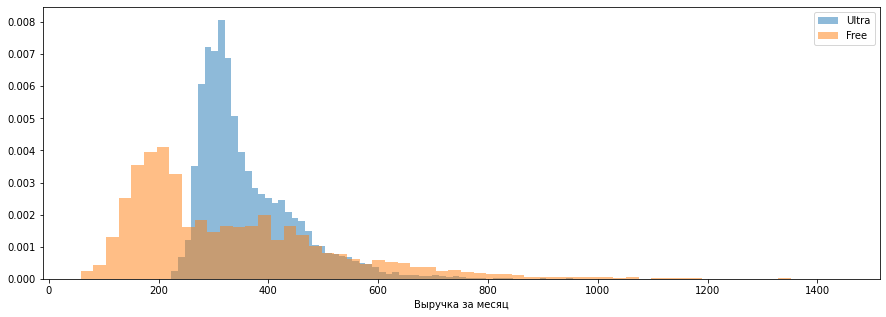

In [42]:


fig, ax = plt.subplots(figsize=(15, 5))


ax.hist(data_ultra_profit['profit'], 60, alpha=0.5, label='Ultra', density=True)
ax.hist(data_free_profit['profit'], 60, alpha=0.5, label='Free', density=True)


plt.xlabel('Выручка за месяц')
plt.legend()
plt.show()

In [43]:
display(data_free_profit['profit'].agg(['sum', 'mean', 'median']))
display(data_ultra_profit['profit'].agg(['sum', 'mean', 'median']))

display(data_ultra_profit['profit'].sum() / data_free_profit['profit'].sum() * 100)
display(data_ultra_profit['profit'].mean() / data_free_profit['profit'].mean() * 100)
display(data_ultra_profit['profit'].median() / data_free_profit['profit'].median() * 100)

sum       2.234104e+06
mean      3.286414e+02
median    2.740000e+02
Name: profit, dtype: float64

sum       1.644537e+06
mean      3.627922e+02
median    3.370000e+02
Name: profit, dtype: float64

73.61058392984391

110.39151766050716

122.99270072992701

Общая выручка за время наблюдений выше от пользователей без подписки на 26%.  
Средняя помесячная выручка ниже от пользователей без подписки на 10%.  
Медианная помесячная выручка ниже от пользователей без подписки на 23%.

In [44]:
data_free_profit['profit'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])


count    6798.000000
mean      328.641365
std       183.868330
min        58.000000
5%        130.000000
25%       194.000000
50%       274.000000
75%       428.000000
95%       694.000000
99%       922.180000
max      1444.000000
Name: profit, dtype: float64

In [45]:
data_mean_median1 = (data_free_profit['profit'].mean() - data_free_profit['profit'].median())\
/ ((data_free_profit['profit'].mean() + data_free_profit['profit'].median()) / 2)
print(data_mean_median1)

0.1813395769726095


In [46]:
data_ultra_profit['profit'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])


count    4533.000000
mean      362.792191
std        88.262737
min       223.000000
5%        271.000000
25%       301.000000
50%       337.000000
75%       409.000000
95%       541.000000
99%       671.080000
max       955.000000
Name: profit, dtype: float64

In [47]:
data_mean_median2 = (data_ultra_profit['profit'].mean() - data_ultra_profit['profit'].median())\
/ ((data_ultra_profit['profit'].mean() + data_ultra_profit['profit'].median()) / 2)
print(data_mean_median2)

0.07371385662378735


In [48]:
count_difference = round((data_free_profit['profit'].count() - data_ultra_profit['profit'].count())\
                         / ((data_free_profit['profit'].count() + data_ultra_profit['profit'].count())/ 2), 2)

mean_difference = round((data_free_profit['profit'].mean() - data_ultra_profit['profit'].mean())\
                        / ((data_free_profit['profit'].mean() + data_ultra_profit['profit'].mean())/ 2), 2)

median_difference = round((data_free_profit['profit'].median() - data_ultra_profit['profit'].median())\
                          / ((data_free_profit['profit'].median() + data_ultra_profit['profit'].median())/ 2), 2)
print(count_difference, mean_difference, median_difference)

0.4 -0.1 -0.21


При сравнении значений параметров прибыли по месяцам от пользователей с подиской и без, замечаем,   
что среднее и медианное значения прибыли за месяц без подписки выше на 5 процентов, чем выручка от пользователей с подпиской.  
С учётом того, что пользователи с бесплатной подпиской обращались к сервису чаще, чем пользователи с платной -     
на 40% больше записей о пользователеях с бесплатной подпиской, регистрирующих использование сервиса в конкретный месяц -  
говорит нам о том, что для компании на данный момент более выгодной является бесплатная подписка.  
Общая выручка за время наблюдений выше от пользователей без подписки на 26%.  
Средняя помесячная выручка выше от пользователей без подписки на 5%.  
Медианная помесячная выручка выше от пользователей без подписки на 5%.

### Шаг 6.4

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. 
Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. 
Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 
Какой тест вам понадобился бы для проверки этой гипотезы?



Для анализа одной генеральной совокупности, с которой произошли изменения, при проверке односторонней в меньшую сторону гипотезы необходимо воспользоваться методом scipy.stats.ttest_rel() с аргументом alternative='less'

### Общий вывод

В данном исследовании был проведён анализ данных о пользователях сервиса аренды самокатов GoFast.   
Источником информации выступили три таблицы.  
В первой таблице находится 1565 записей о пользователях по следующим характеристикам:  
- id пользователя
- имя
- возраст
- город
- тип подписки   
Во второй таблице 18068 записей о поездках пользователей по следующим парамтрам:
- id пользователя
- расстояние
- продолжительность
- дата поездки   
В третьей таблице описывается тарифы пользования сервисом по следующим параметрам:
- название тарифа
- стоимость минуту
- стоимость начала поездки
- стоимость месячной подписки  

При исследовании таблицы с информацией о пользователях были обнаружены и удалены 31 дубликат.
Выявлены 194 уникальных имени и 1534 уникальных id пользователей.   
Также был проведена заменена типа данных на date в столбце с датой.
Пропуски в таблицах не были обнаружены.  
При анализе данных таблиц информмация о поездках была проанализирована по параметрам, отражающим использование сервиса польователями.  
Таким образом были выявлены следующие ключевые наблюдения:  
    1) Частота встречаемости городов  
    Чаще всего пользуются сервисом в Пятигорске - на него приходится 14.5% поездок. 
    Реже всего пользуются сервисом в Москве - на неё приходится 11.0% поездок.  
    2) Соотношение пользователей с подпиской и без подписки  
    54.4% приходится на пользователей без подписки, у 45.6% пользователей есть подписка.  
    3) Возраст пользователей  
    Средное и медианное значение возраста близки и равны 25 годам.  
Минимальный возраст = 12 лет  
Максимальный возраст = 43 года  
    4) Расстояние, которое пользователь преодолел за одну поездку 
    Среднее расстояние = 3070 м.  
Медианное расстояние = 3133 м.  
Минимальное расстояние = 1 м.  
Максимальное расстояние = 7211 м.      
    5) Продолжительность поездок  
Средное и медианное значение возраста близки и равны 18 мин.  
Минимальное время = 0.5 мин.  
Максимальное время = 40.8 мин.        

Данные всех таблиц были объеденены в единую сводную таблицу. Также были созданы таблицы отдельно для пользователей без подписки и с подпиской.  
Были проанализированны данные для пользователей разных тарификаций:    
    1) Подписка    
Исследование времени использования:    
Среднее значение = 18 мин.  
Медианное значение = 18 мин.  
Минимальное = 3 мин.  
Максимальное = 40 мин.  

Исследование расстояния :  
Среднее значение = 3114.9 м.  
Медианное значение = 3148 м.  
Минимальное = 244 м.  
Максимальное = 5699 м.    
    2) Без подписки    
Исследование времени :  
Среднее значение = 16.8 мин.  
Медианное значение = 17 мин.  
Минимальное = 0 мин.  
Максимальное = 34 мин.  

Исследование расстояния :  
Среднее значение = 3044.9 м.  
Медианное значение = 3114 м.  
Минимальное = 0 м.  
Максимальное = 7211 м.     
По вышеперечисленным параметрам была также построена визуализация распределения значений.    

В сводной таблице был добавлен столбец, в котором отражена помесячная выручка от каждого пользователя сервиса.  
От менеджмента были получены гипотезы, которые в исследовании были проверены тестом поиска p-value - значение, позволяющее определять, отвергать или принимать гипотезу.  
Для каждого из тестов по умолчанию устонавливаем уровень статистической значимости альфа равным 0,05. Если p-value меньше значения альфа, то первоначальную гипотезу мы отвергаем в пользу альтернативной.
По дополненной таблице были проверены следующие гипотезы:  
1) Пользователи с подпиской тратят больше времени на поездки   
    За нулевую гипотезу берём равенство средних значений времени генеральных совокупностей пользователей с подпиской и без подписки.   
    За альтернативную - время использования сервиса пользователями по подписке больше, чем без подписки   
    Был проведён т-тест, в результате которого получили p-value равной 1.18e-36, что меньше значения альфа (0.05). Таким образом узнаём, что среднее значение времени пользователей двух выборок не равны, а значит есть основания говорить, что пользователи по подписке тратят больше времени в сервисе.  
    Также были вычеслены в численном выржении различия во времени использования между пользователями двух разных тарифов:  
    Пользователи по подписке в среднем тратят на поездки на 1 минуту больше, чем пользователи без подписки. 
    Эта разница составляет 5.7% среднего значения затраченного времени на дорогу.
    
2) Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.    
    Сформировали нулевую и альтернативную гипотезу:  
    Нулевая: среднее расстояние генеральной совокупности пользователей с подпиской близки оптимальному значению 3130 метров.     
    Альтернативная: среднее расстояние генеральной совокупностей пользователей с подпиской выше оптимального значения 3130 метров.  
    Т-тест не отверг нулевую гипотезу. Полученное значение p-value (0.91) больше заданного уровня значимости альфа (0.05). Есть основания говорить, что пользователи с подпиской проезжают расстояния близкое оптимальному значению.  
    Также были проведены вычисления по значениям в таблице:      
   Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров и равняется 3115 метров.  
    Это может означать, что использование самокатов пользователями с подпиской назодится в пределах плана эксплуатации техники и не требует пересмотра.        
         

3) Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.       
    Сформировали нулевую и альтернативную гипотезу:  
    Нулевая: средняя помесячная прибыль генеральной совокупности пользователей с подпиской и без подписки равны.   
    Альтернативная: средняя помесячная прибыль генеральной совокупности пользователей с подпиской выше.    
    Т-тест отверг нулевую гипотезу. Полученное значение p-value (8.87e-40) меньше заданного уровня значимости альфа (0.05). Есть основания говорить, что пользователи с подпиской приносят большую помесячную прибыль, чем пользователи без подписки.  
    При сравнении значений параметров прибыли по месяцам от пользователей с подиской и без, замечаем, что среднее значение прибыли за месяц без подписки ниже на 10 процентов, чем выручка от пользователей с подпиской, а медианное - ниже на 20%   Это подкрепляет результаты теста.      

Подведём итог:  
    После проверки гипотез есть основания говорить, пользователи с подпиской выгоднее компании:   
        - они тратят больше времени при использовании сервиса;  
        - помесячная прибыль от них поступает выше, чем от пользователей без подписки;  
        - в среднем пользователи по подписке не преодолевают расстояние больше, чем оптимальное с точки зрения износа самоката (3130 м.)  
Таким образом, для развития компании стоит сфокусироваться на акциях, нацеленных на расширение этого сегмента пользователей.

#### Шаг 7. Распределения

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 
100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 
5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


95.02270393485402

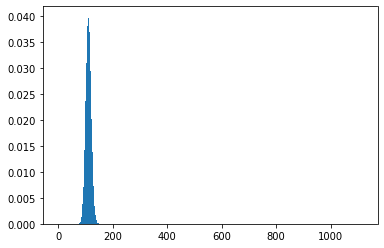

In [49]:


p = 0.1 
n = 1115 

mu = n * p
sigma = sqrt(n * p * (1 - p))

distr = []
distr2 = st.norm(mu, sigma)

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.bar(range(0, n + 1), distr)




distr2.ppf(0.05)

При рассылке 1115 промокодов, вероятность не выполнить план будет 5%.

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 
1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

0.154

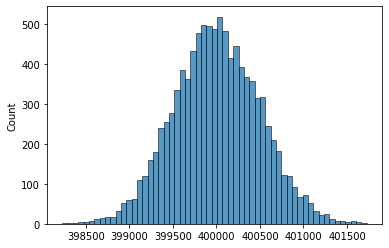

In [50]:
n=1000000
p = 0.4
distr = binom(n, p)

sns.histplot(distr.rvs(10000))
round(distr.cdf(399500),3)

При рассылке 1 млн уведомлений, вероятность того, что их откроют 399,5 тыс. пользователей равна 15.4%